In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('MSFT' , start="2015-01-01", end="2024-12-31" , auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-01-02,39.998688,40.563254,39.810501,39.913149,27913900
2015-01-05,39.630890,39.973050,39.562456,39.665104,39673900
2015-01-06,39.049206,39.990149,38.955111,39.673650,36447900
2015-01-07,39.545345,39.742088,38.912348,39.331494,29114100
2015-01-08,40.708675,40.845540,39.964475,39.990136,29645200
...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500


In [5]:
data.isnull().sum()

Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64

In [6]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

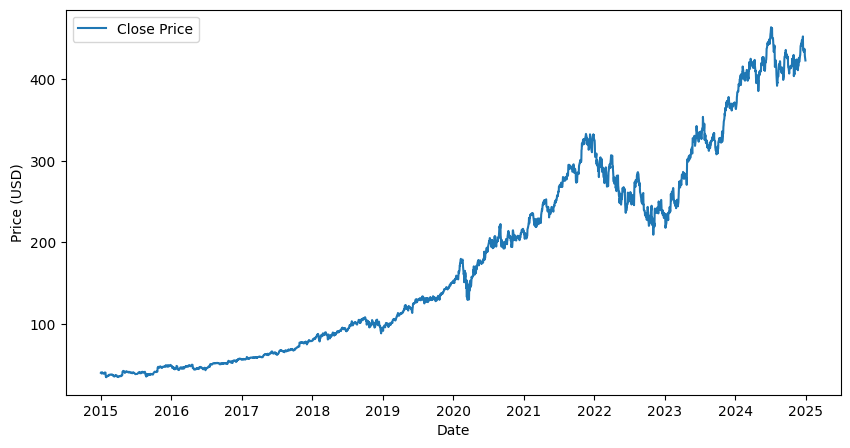

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [8]:
data.columns

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [9]:
data['rolling_mean_close'] = data['Close'].rolling(window=20).mean()

In [10]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,
2015-01-02,39.998688,40.563254,39.810501,39.913149,27913900,NaN
2015-01-05,39.630890,39.973050,39.562456,39.665104,39673900,NaN
2015-01-06,39.049206,39.990149,38.955111,39.673650,36447900,NaN
2015-01-07,39.545345,39.742088,38.912348,39.331494,29114100,NaN
2015-01-08,40.708675,40.845540,39.964475,39.990136,29645200,NaN
...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500,437.669812


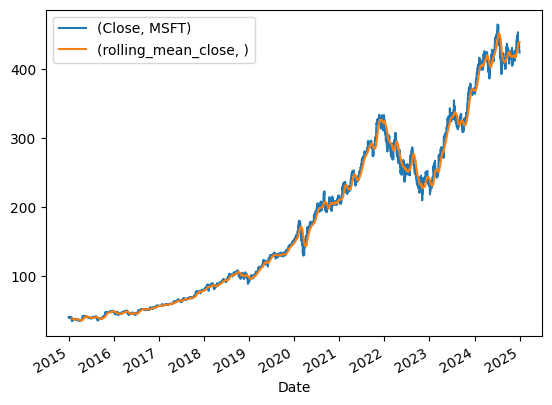

In [11]:
data[['Close' , 'rolling_mean_close']].plot()
plt.legend()
plt.show()

In [12]:
data['RSI'] = 100 - (100 / (1 + data['Close'].pct_change().rolling(window=14).apply(lambda x: (x[x>0].sum()/abs(x[x<0].sum())) if abs(x[x<0].sum())>0 else 0)))

In [13]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close,RSI
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
Date,,,,,,,
2015-01-02,39.998688,40.563254,39.810501,39.913149,27913900,NaN,NaN
2015-01-05,39.630890,39.973050,39.562456,39.665104,39673900,NaN,NaN
2015-01-06,39.049206,39.990149,38.955111,39.673650,36447900,NaN,NaN
2015-01-07,39.545345,39.742088,38.912348,39.331494,29114100,NaN,NaN
2015-01-08,40.708675,40.845540,39.964475,39.990136,29645200,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745,54.441397
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500,437.669812,52.397158


In [14]:
data = data.dropna().copy()

In [15]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close,RSI
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
Date,,,,,,,
2015-01-30,34.558334,35.567712,34.515562,35.542047,78004900,38.932866,23.767290
2015-02-02,35.311096,35.388083,34.412922,34.720868,50352500,38.698487,30.464166
2015-02-03,35.584820,35.867105,35.114348,35.610484,52082400,38.496183,32.823779
2015-02-04,35.790123,36.106622,35.379529,35.875662,41614800,38.333229,35.120424
2015-02-05,36.311905,36.474431,35.807216,36.115162,36548200,38.171557,39.551989
...,...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745,54.441397
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500,437.669812,52.397158


In [16]:
data.to_excel('Modified_stock_analysis.xlsx')

In [17]:
data['lag1'] = data['Close'].shift(1)
data['lag2'] = data['Close'].shift(2)
data['lag3'] = data['Close'].shift(3)

In [18]:
data

Price,Close,High,Low,Open,Volume,rolling_mean_close,RSI,lag1,lag2,lag3
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,
Date,,,,,,,,,,
2015-01-30,34.558334,35.567712,34.515562,35.542047,78004900,38.932866,23.767290,NaN,NaN,NaN
2015-02-02,35.311096,35.388083,34.412922,34.720868,50352500,38.698487,30.464166,34.558334,NaN,NaN
2015-02-03,35.584820,35.867105,35.114348,35.610484,52082400,38.496183,32.823779,35.311096,34.558334,NaN
2015-02-04,35.790123,36.106622,35.379529,35.875662,41614800,38.333229,35.120424,35.584820,35.311096,34.558334
2015-02-05,36.311905,36.474431,35.807216,36.115162,36548200,38.171557,39.551989,35.790123,35.584820,35.311096
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500,436.646745,54.441397,434.927887,435.356201,435.714844
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500,437.669812,52.397158,433.583038,434.927887,435.356201


In [19]:
data = data.dropna().copy()

In [20]:
features = [ 'rolling_mean_close' , 'RSI' , 'lag1' , 'lag2' , 'lag3' ]

In [21]:
X = data[features]
y = data['Close']

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
X.shape

(2493, 5)

In [24]:
y.shape

(2493, 1)

In [38]:
X_train = X.iloc[:1997]
y_train = y.iloc[:1997]
X_test = X.iloc[1997:]
y_test = y.iloc[1997:].copy()

In [39]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [40]:
y_test['y_pred'] = y_pred

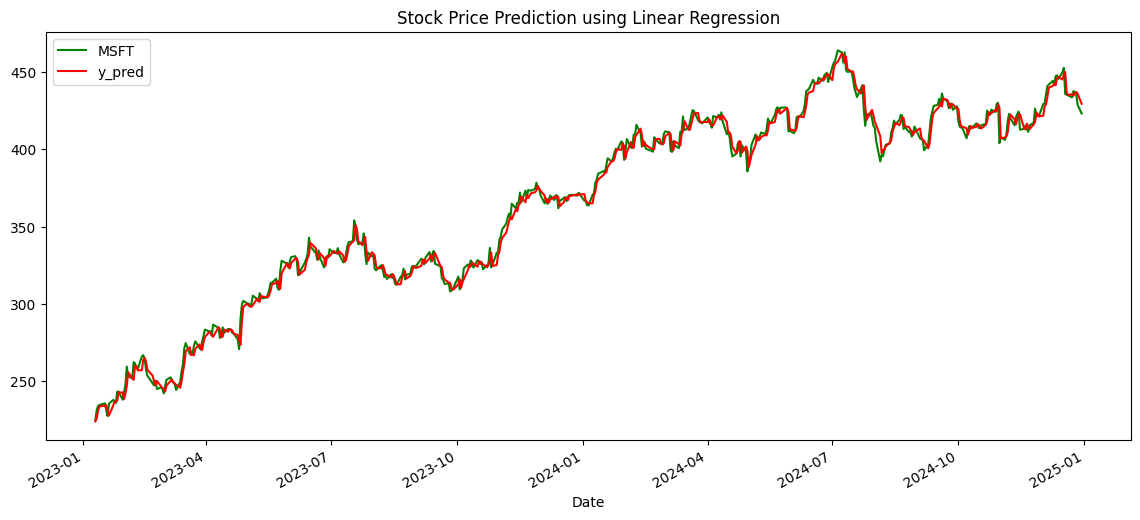

In [42]:
plt.figure(figsize=(14,6))
y_test['MSFT'].plot(color = 'green')
y_test['y_pred'].plot(color = 'red')
plt.legend()
plt.title("Stock Price Prediction using Linear Regression")
plt.show()